# Implementing linear regression algorithm

## Quadratic linear regression

Importing the libraries

In [131]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [132]:
trainData = pd.read_csv('./train.csv')
trainData.drop(trainData[trainData['x'] > 100].index,inplace = True)
trainData = trainData.values
testData = pd.read_csv('./test.csv')
testData = testData.values

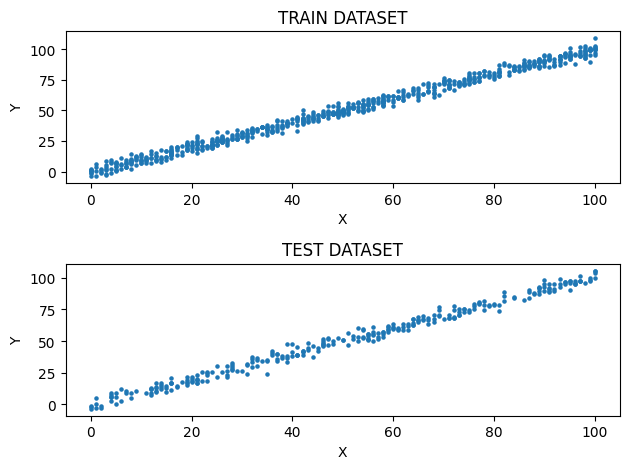

In [133]:
figure,axis = plt.subplots(2,1)
trainX = trainData[::,0]
trainY = trainData[::,1]
axis[0].set_title("TRAIN DATASET")
axis[0].scatter(trainX,trainY,s = 5)
axis[0].set_xlabel('X')
axis[0].set_ylabel('Y')
testX = testData[::,0]
testY = testData[::,1]
axis[1].set_title('TEST DATASET')
axis[1].scatter(testX,testY,s = 5)
axis[1].set_xlabel('X')
axis[1].set_ylabel('Y')
figure.tight_layout()
plt.show()
trainX = trainX.reshape(-1,1)
testX = testX.reshape(-1,1)


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(trainX,trainY)
y_pred = clf.predict(testX)
print(r2_score(testY,y_pred))

0.9888014444327563


In [135]:
def cost(theta,data):
    ret = 0
    theta = np.reshape(np.array(theta),(len(theta),1))
    for row in data:
        x = row[0:-1:]
        x = np.concatenate(([1],x),axis = 0)
        x = np.reshape(x,(len(x),1))
        y = row[-1,]
        ret += float((np.matmul(np.transpose(theta),x) - y)**2)        
    return ret/2